In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Group selection

In [ ]:
edry_final = np.load("/content/drive/MyDrive/GPCRBert/data/final_edry_class.npy", allow_pickle=True)

def class_counter(data):
  class_freq = {}
  for d in data:
      if d[3] in class_freq:
          class_freq[d[3]] += 1
      else:
          class_freq[d[3]] = 1

  # Remove dictionaries with unique classes
  npxxy2 = [d for d in data if class_freq[d[3]] > 0]

  class_list = []
  for i, _ in enumerate(npxxy2):
    clas = npxxy2[i][3]
    class_list.append(clas)

  element_counts = Counter(class_list)
  for element, count in element_counts.items():
    print(f"{element}: {count}")

class_counter(edry_final)

adrb2: 21
adrb1: 23
oprx: 3
aa2ar: 24
cnr2: 4
sucr1: 3
apj: 2
cxcr4: 5
ccr5: 3
ccr6: 1
agtr2: 3
cnr1: 5
opsd: 20
ccr2: 3
ccr7: 1
5ht2b: 8
cxcr2: 3
gpr52: 4
npy2r: 1
5ht2c: 2
drd1: 9
nk1r: 6
mtr1b: 3
oprm: 3
oprd: 3
lt4r1: 1
agtr1: 2
aa1r: 3
p2y12: 3
oprk: 3
5ht1d: 1
5ht2a: 4
q80km9: 1
b1b1u5: 1
mtr1a: 4
ccr9: 1
5ht1b: 3
5ht1e: 1
drd3: 2
ntr1: 4
cckar: 2
s1pr1: 2
ghsr: 1
ednrb: 4
mc4r: 1
gpbar: 3
ta2r: 2


In [ ]:
data = np.load("/content/drive/MyDrive/GPCRBert/inference result/proteins_EDRY_(head0).npy", allow_pickle=True)

name_list = ['aa2ar', 'adrb1', 'adrb2', 'opsd']
choose = 3

index_list = []
for i in range(data.shape[0]):
    if name_list[choose] in data[i]['pdb']:
        index_list.append(i)

print(index_list)
print(len(index_list))

data = data[index_list]

print(data[0]['seq'])

[39, 52, 173, 174, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193]
20
DLRDNETWWYNPSIIVHPHWREFDQVPDAVYYSLGIFIGICGIIGCGGNGIVIYLFTKTKSLQTPANMFIINLAFSDFTFSLVNGFPLMTISCFLKKWIFGFAACKVYGFIGGIFGFMSIMTMAMISIJRYNVIGRPMAASKKMSHRRAFIMIIFVWLWSVLWAIGPIFGWGAYTLEGVLCNCSFDYISRDSTTRSNILCMFILGFFGPILIIFFCYFNIVMSVSNHEKEMAAMAKRLNAKELRKAQAGANAEMRLAKISIVIVSQFLLSWSPYAVVALLAQFGPLEWVTPYAAQLPVMFAKASAIHNPMIYSVSHPKFREAISQTFPWVLTCCQFDDKETEDDKDAETEIPAGESSDAAPSADAAQMKEJJ


### For first X

Data number : 0
pdb : opsd_todpa_2ZIY_prot.pdb
The Index of E/D of E/DRY is 128 in JRYNVI
Data number : 1
pdb : opsd_todpa_2Z73_prot.pdb
The Index of E/D of E/DRY is 123 in JRYNVI
Data number : 2
pdb : opsd_bovin_6FUF_prot.pdb
The Index of E/D of E/DRY is 132 in JRYVVV
Data number : 3
pdb : opsd_bovin_6QNO_prot.pdb
The Index of E/D of E/DRY is 132 in JRYVVV
Data number : 4
pdb : opsd_human_6CMO_prot.pdb
The Index of E/D of E/DRY is 133 in JRYVVV
Data number : 5
pdb : opsd_human_5W0P_prot.pdb
The Index of E/D of E/DRY is 133 in JRYVVV
Data number : 6
pdb : opsd_human_5DGY_prot.pdb
The Index of E/D of E/DRY is 133 in JRYVVV
Data number : 7
pdb : opsd_bovin_4BEZ_prot.pdb
The Index of E/D of E/DRY is 133 in JRYVVV
Data number : 8
pdb : opsd_bovin_5DYS_prot.pdb
The Index of E/D of E/DRY is 133 in JRYVVV
Data number : 9
pdb : opsd_bovin_6FK9_prot.pdb
The Index of E/D of E/DRY is 133 in JRYVVV
Data number : 10
pdb : opsd_bovin_6FKB_prot.pdb
The Index of E/D of E/DRY is 133 in JRYVVV
Data numb

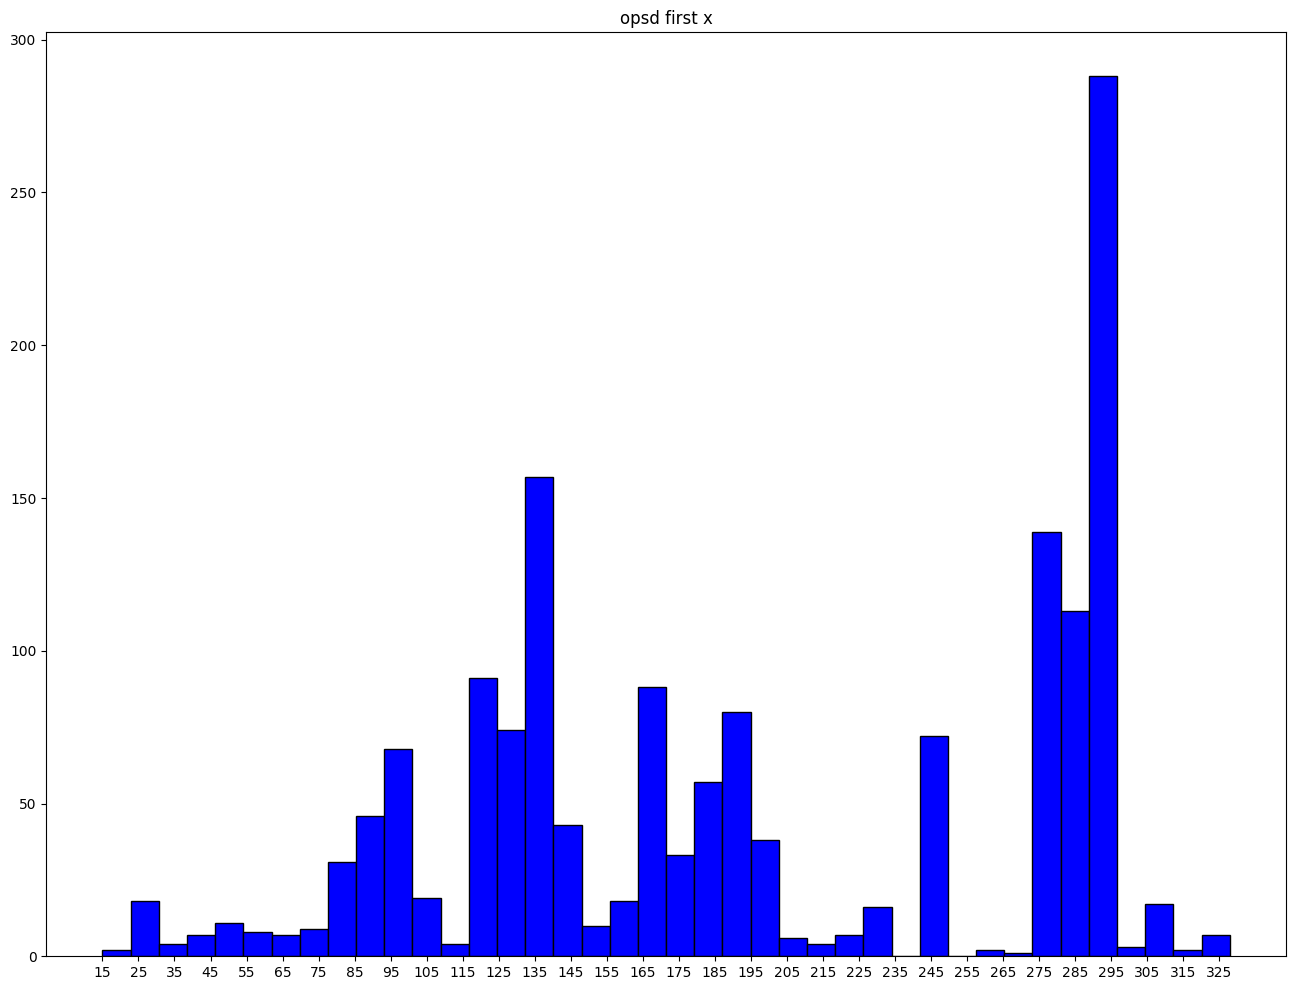

In [ ]:
correlation_index = []

for k in range(16):
  data = np.load(f"/content/drive/MyDrive/GPCRBert/inference result/proteins_EDRY_(head{k}).npy", allow_pickle=True)
  data = data[index_list]
  # most_cor1 = []
  # most_cor2 = []
  # most_cor3 = []
  # most_cor4 = []
  # most_cor5 = []

  for j in range(data.shape[0]):

      pdb = data[j]['pdb']
      seq = data[j]['seq']
      attention = data[j]['attention']
      try:
        index = [i for i, s in enumerate(seq) if s == 'Y' and seq[i-1]=='R' and seq[i-2]=='J']
        raise IndexError
      except IndexError:
        pass
      #print(f'Data number : {j}')
      #print(f'pdb : {pdb}')
      if type(index) == list:
        index = index[0] - 2 # first X
      else:
        pass
      if k == 0:
        print(f'Data number : {j}')
        print(f'pdb : {pdb}')
        print(f'The Index of E/D of E/DRY is {index} in {seq[index:index+6]}')

      row = attention[index] # row of first X


      max_index1 = np.argmax(row)
      correlation_index.append(max_index1)
      #print(f' Most Correlated sequence is {seq[max_index1]} in {seq[max_index1:max_index1+6]} at Index: {max_index1}. Attention Weight: {row[max_index1]}')
      row[max_index1] = 0

      max_index2 = np.argmax(row)
      correlation_index.append(max_index2)
      #print(f' Second Most Correlated sequence is {seq[max_index2]} in {seq[max_index2:max_index2+6]} at Index: {max_index2}. Attention Weight: {row[max_index2]}')
      row[max_index2] = 0

      max_index3 = np.argmax(row)
      correlation_index.append(max_index3)
      #print(f' Third Most Correlated sequence is {seq[max_index3]} in {seq[max_index3:max_index3+6]} at Index: {max_index3}. Attention Weight: {row[max_index3]}')
      row[max_index3] = 0

      max_index4 = np.argmax(row)
      correlation_index.append(max_index4)
      #print(f' Fourth Most Correlated sequence is {seq[max_index4]} in {seq[max_index4:max_index4+6]} at Index: {max_index4}. Attention Weight: {row[max_index4]}')
      row[max_index4] = 0

      max_index5 = np.argmax(row)
      correlation_index.append(max_index5)
      #print(f' Fifth Most Correlated sequence is {seq[max_index5]} in {seq[max_index5:max_index5+6]} at Index: {max_index5}. Attention Weight: {row[max_index5]}')

plt.figure(figsize=(16, 12))
plt.hist(correlation_index, bins=40, color='blue', edgecolor='black')
xtick_positions = np.arange(min(correlation_index), max(correlation_index), 10)
xtick_labels = [str(x) for x in xtick_positions]

plt.title(f'{name_list[choose]} first x')
plt.xticks(xtick_positions, xtick_labels)
plt.show()

In [ ]:
data = np.load(f"/content/drive/MyDrive/GPCRBert/inference result/proteins_NPXXY_(head{k}).npy", allow_pickle=True)
data = data[index_list]


for i in range(data.shape[0]):
  print(len(data[i]['seq']))
  print(data[0]['seq'][15:40])

372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL


In [ ]:
edry_final = np.load("/content/drive/MyDrive/GPCRBert/data/final_npxxy+cwxp_class.npy", allow_pickle=True)
print(len(edry_final))

254


In [ ]:
edry_final = np.load("/content/drive/MyDrive/GPCRBert/data/final_npxxy+cwxp_class.npy", allow_pickle=True)

def class_counter(data):
  class_freq = {}
  for d in data:
      if d[3] in class_freq:
          class_freq[d[3]] += 1
      else:
          class_freq[d[3]] = 1

  # Remove dictionaries with unique classes
  npxxy2 = [d for d in data if class_freq[d[3]] > 2]
  print(len(class_freq)) # total 62 classes, 11 classes >= 5 (143), 17 >= 4, (167), 31 >= 3
  class_list = []
  for i, _ in enumerate(npxxy2):
    clas = npxxy2[i][3]
    class_list.append(clas)

  element_counts = Counter(class_list)
  for element, count in element_counts.items():
    print(f"{element}: {count}")

class_counter(edry_final)

62
adrb2: 21
adrb1: 23
ox1r: 14
oprx: 3
aa2ar: 24
cnr2: 4
ntr1: 4
sucr1: 3
cxcr4: 5
opsd: 20
ccr5: 3
agtr2: 3
cltr2: 4
ox2r: 8
cnr1: 5
ccr2: 3
5ht2b: 8
cxcr2: 3
gpr52: 4
drd1: 9
nk1r: 6
mtr1b: 3
oprm: 3
oprd: 3
aa1r: 3
p2y12: 3
oprk: 3
5ht2a: 4
lpar1: 3
5ht1b: 3
mtr1a: 4
ednrb: 4
gpbar: 3
